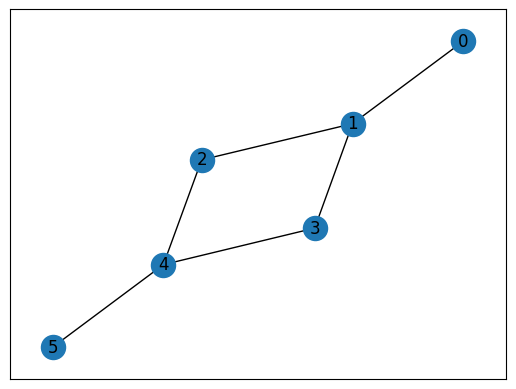

[(0, 1), (1, 2), (1, 3), (2, 4), (3, 4), (4, 5)]
[0, 1, 2, 3, 4, 5]


In [114]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import itertools
from itertools import combinations
from itertools import permutations
from functools import reduce
import random
from collections import defaultdict
# Define the adjacency matrix
adj_matrix = [
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0 , 0, 0, 0, 1, 0]
]

# Create an empty directed graph
G = nx.Graph()

# Add nodes to the graph
for i in range(len(adj_matrix)):
    G.add_node(i)

# Add edges to the graph based on the adjacency matrix
for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix[i])):
        if adj_matrix[i][j] == 1:
            G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

print (list(G.edges()))
print(list(G.nodes()))


In [115]:
def MaximalNodes(G):
    edges=list(G.edges())
    nodes=list(G.nodes())
    H=nx.DiGraph()
    maxnodes=[]
    cleanmaxnodes=[]
    Digraph=False

    occur=[0 for i in range(0,len(nodes))]
    
    # Collect maximal nodes
    
    
    for i, node in enumerate(nodes):
        for edge in edges:
            if edge[0]==node or edge[1]==node:
                occur[i]=occur[i]+1
        if occur[i]==1:
            maxnodes.append(node)
    
    if maxnodes==[]:
        return(nodes)
    
    if type(G)==type(H):
        for i in range(0,len(edges)):
            if edges[i][0] in maxnodes:
                cleanmaxnodes.append(edges[i][0])
        Digraph=True
        if cleanmaxnodes==[]:
            return([random.choice(nodes)])
    
    
    if Digraph==True:
        return(cleanmaxnodes)

    elif Digraph==False:
        return(maxnodes)

    


# def find_intersections(sets):
#     intersections = []
    
#     # Convertir les frozenset en set temporairement pour les opérations d'intersection
#     original_sets = [set(s) for s in sets]
#     temp_sets = [s.copy() for s in original_sets]
    
#     # Répéter la recherche d'intersections autant de fois qu'il y a de sets
#     for _ in range(len(sets)):
#         found_intersection = False
        
#         # Parcourir toutes les combinaisons possibles avec un ensemble de moins dans le set
#         for r in range(len(temp_sets), 1, -1):
#             for combination in itertools.combinations(temp_sets, r):
#                 common_elements = set.intersection(*combination)
                
#                 if common_elements:
#                     intersections.append(list(common_elements))
#                     found_intersection = True
                    
#                     # Retirer les éléments de l'intersection des ensembles originaux
#                     for s in original_sets:
#                         s -= common_elements
                    
#                     # Mettre à jour temp_sets avec les ensembles originaux modifiés
#                     temp_sets = [s.copy() for s in original_sets if s]
                    
#                     break  # Sortir des boucles après avoir trouvé une intersection
#             if found_intersection:
#                 break
        
#         if not found_intersection:
#             # Si aucune intersection n'est trouvée, arrêter la boucle
#             break
    
#     # Ajouter les éléments restants non intersectés individuellement
#     remaining_elements = set.union(*original_sets)
#     for element in remaining_elements:
#         intersections.append([element])
        
#     return intersections

# def intersectionate(l):
#     if len(l) == 0:
#         return [], []
#     if len(l) == 1:
#         return l, set(l[0])
    
#     set_list = [set(e) for e in l]
#     inter = set.intersection(*set_list)
#     if len(inter) not in [0, len(l)]:
#         return l, inter
#     results = []
#     for i in range(len(l)):
#         l2 = l[:]
#         l2.remove(l[i])
#         results.append(intersectionate(l2))
      
#     def f(x, y):
#         if len(x[0]) > len(y[0]):
#             return x
#         return y
    
#     return reduce(f, results)

# def Vertex(mset):
#     results = []
#     while max(map(len, mset)) > 0:
#         element_to_remove = list(intersectionate(mset)[1])
#         if element_to_remove!=[]:
#             results.append(element_to_remove)
#             mset2 = []
#             for el in mset:
#                 new_elements = []
#                 for el2 in el:
#                     if el2 not in element_to_remove:
#                         new_elements.append(el2)
#                 mset2.append(frozenset(new_elements))
#             mset = mset2
            
#         else:
#             for el in mset:
#                 if el!=frozenset():
#                     last_elements=[]
#                     for el2 in el:
#                             last_elements.append(el2)
#                     results.append(last_elements)
#             break
        
#     return(results)



# def intersection(l):
#     if len(l) == 0:
#         return [], set()
#     if len(l) == 1:
#         return l, l[0]
    
    
#     best_result = ([], set())
#     stack = [(l, set.intersection(*map(set, l)))]
    
#     while stack:
#         current_l, current_inter = stack.pop()
        
#         if len(current_inter) not in [0, len(current_l)]:
#             return current_l, current_inter
        
#         if len(current_l) > len(best_result[0]):
#             best_result = (current_l, current_inter)
        
#         for i in range(len(current_l)):
#             l2 = current_l[:i] + current_l[i+1:]
#             if l2:
#                 new_inter = set.intersection(*map(set, l2))
#                 stack.append((l2, new_inter))
    
#     return best_result

# # Fonction Vertex compatible avec la nouvelle intersection
# def Vertex(mset):
#     results = []
#     while max(map(len, mset)) > 0:
#         element_to_remove = list(intersection(mset)[1])
#         if element_to_remove != []:
#             results.append(element_to_remove)
#             mset2 = []
#             for el in mset:
#                 new_elements = [el2 for el2 in el if el2 not in element_to_remove]
#                 mset2.append(frozenset(new_elements))
#             mset = mset2
#         else:
           
#             for el in mset:
#                 if el:
#                     results.append(list(el))
#             break
        
#     return results

def MPathMatrix(mset,graph):
    nodes=list(graph.nodes())
    binpath=[]
    matbin=np.zeros((len(nodes),len(mset)),dtype=int)
    
    for k in range(len(nodes)):
        for i in range(len(mset)):
            if nodes[k] in mset[i]:
                matbin[k][i]=1
                
    for i in range(len(nodes)):
        binpath.append(int("".join(map(str,matbin[i])),2))
    mat=[nodes,binpath]
     
    return (mat)
            
def DictNodes(mat):
    d=dict()
    l=[]
    for i in range(0,len(mat[0])):
        for j in range(0,len(mat[0])):
            if mat[1][i] not in d:
                d[mat[1][i]]=set()
            if i==j:
                d[mat[1][i]].add(mat[0][j])
    for k in d.items():
        l.append(list(k[1]))
        
    return l
                

In [116]:
# def remove_duplicates(list_of_lists):



#     if list_of_lists==[]:
#         return(list_of_lists)

#     # Sort each list of strings

#     sorted_lists = [sorted(l) for l in list_of_lists]


#     # Sort the list of lists

#     sorted_lists.sort()


#     # Initialize result list

#     result = [sorted_lists[0]]


#     # Iterate over the sorted list of lists

#     for i in range(1, len(sorted_lists)):

#         # If the current list is not a duplicate

#         if not sorted_lists[i] == result[-1]:

#             # Add it to the result list

#             result.append(sorted_lists[i])


#     # Return the result list

#     return result

def CreateEdges(oc, vertex):
    edges=set()
    if len(vertex)>1:
        for el in oc:
            l = []
            for i, el2 in enumerate(el):
                if el2 == 1:
                    l.append(str(vertex[i]))
            edges.update(set(map(frozenset, frozenset(permutations(l,2)))))
    if edges==[] or len(vertex)==1:
        edges=[vertex[0]]
        return (edges)
    return(edges)

def CreateSimplices(oc, vertex):
    simplices=set()
    simplices2=[]
    if len(vertex)>1:
        for el in oc:
            for j in range(2,len(vertex)+1):
                l = []
                for i, el2 in enumerate(el):
                    if el2 == 1:
                        l.append(str(vertex[i]))
                simplices.update(set(map(frozenset, frozenset(permutations(l,j)))))
        if simplices==set():
            simplices.update(set(list(vertex[0])))
    #conversion en liste
    simplices=list(simplices)
    for i in range(len(simplices)):
        simplices2.append(list(simplices[i]))
    
    for i in list(map(list,vertex)):    
        simplices2.append([str(i)])
        
    return(simplices2)

In [117]:
def get_node_attributes(G1, G2, node1, node2):
   # function to get node attributes and creates vertex attributes for the simplicial complex
    attributes = G1.nodes[node1]

    for attribute, value in attributes.items():
        if attribute in G2.nodes[str(node2)]:
            if value not in G2.nodes[str(node2)][attribute]:
                G2.nodes[str(node2)][attribute] = G2.nodes[str(node2)].get(attribute, []) + [value]
        else :
            G2.nodes[str(node2)][attribute] = G2.nodes[str(node2)].get(attribute, []) + [value]

        
def AddVertexAttributes(G1,G2,V):
  # Creates vertices attributes
    nodeinfo=list(G1.nodes(data=True))
    
    if nodeinfo==[]:
        return()
      
    else:
        for i in range(len(nodeinfo)):
            for j in range(len(V)):
                if nodeinfo[i][0] in V[j]:
                    get_node_attributes(G1,G2, nodeinfo[i][0],V[j])
                    
                    
                    break

def AddSimplicesAttributes(G1,G2,S):
    # Creates simplices attributes
    nodeinfo1=list(G1.nodes(data=True))
    nodeinfo2=list(G2.nodes(data=True))
    nodes=list(G1.nodes())
    vertex=list(G2.nodes())
    d=dict()
    # First part that creates the empty dictionnary with the attributes and possibles values
    if nodeinfo1==[]:
        return()
      
    else:
        for i in range(len(nodes)):
            for attribute, value in nodeinfo1[i][1].items():
                if attribute not in d:
                    d[attribute]=dict()
                    d[attribute][value]=list()
                else:
                    if value not in d[attribute]:
                        d[attribute][value]=list()
                        
    
    # Second part to add the simplices in the right places
    for i in range(len(vertex)):
        for j in range(len(S)):
            if nodeinfo2[i][0] in S[j]:
                for attribute,values in nodeinfo2[i][1].items():
                    for value in values:
                        if S[j] not in d[attribute][value]:

                            d[attribute][value].append(S[j])
    return(d)
                
        
        
                   
                
                


def get_simplices_by_attribute(d):
    # you input the attribute's name and a value and returns all the simplices who have this attribute's value
    attribute = input("Enter attribute's name : ")

    value = input(f"Enter attribute's value '{attribute}' : ")

    result=d[attribute][value]

    if result:
            
        print(f" Simplices with the attribute's name '{attribute}' and the value '{value}' are :")
        for r in result:
            print(r)
       

    else:

        print(f"No simplices with the attribute's name '{attribute}' and the value '{value}'")

    

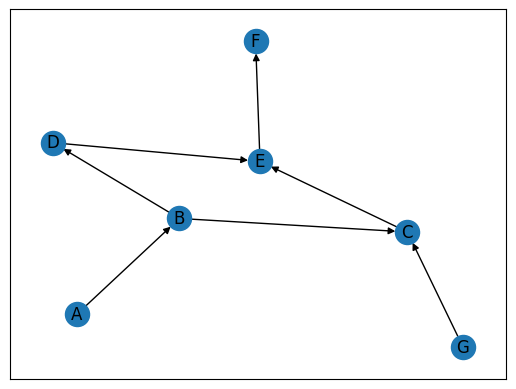

Maximal Nodes are : ['A', 'G']
Vertex set for the simplicial complex: [['B', 'A'], ['C'], ['D'], ['F', 'E'], ['G']]
Simplices set : [["['B', 'A']", "['D']", "['F', 'E']"], ["['C']", "['F', 'E']"], ["['B', 'A']", "['F', 'E']"], ["['G']", "['C']"], ["['C']", "['B', 'A']"], ["['B', 'A']", "['D']"], ["['G']", "['C']", "['F', 'E']"], ["['F', 'E']", "['D']"], ["['C']", "['B', 'A']", "['F', 'E']"], ["['G']", "['F', 'E']"], ["['B', 'A']"], ["['C']"], ["['D']"], ["['F', 'E']"], ["['G']"]]


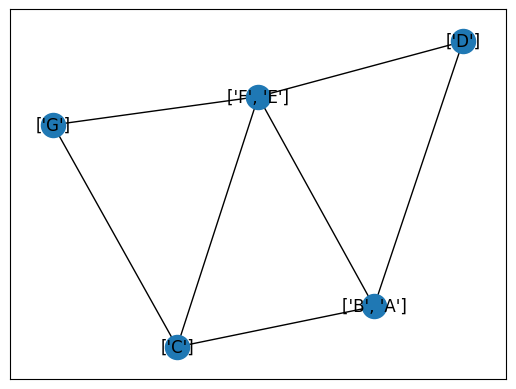

[("['C']", {'color': ['green']}), ("['B', 'A']", {'color': ['red', 'blue'], 'shape': ['triangle']}), ("['F', 'E']", {'color': ['red']}), ("['D']", {'shape': ['circle']}), ("['G']", {'color': ['yellow']})]


In [118]:
def dfs_paths(graph, start_node, path, visited, all_paths):
    """
    Recursive function to perform a depth-first search and collect all maximal paths.
    :param graph: The NetworkX graph.
    :param start_node: The current node to visit.
    :param path: The current path being constructed.
    :param visited: A set of already visited nodes.
    :param all_paths: A list to store all maximal paths.
    """
    visited.add(start_node)
    path.append(start_node)
    
    # Get neighbors that are not visited
    neighbors = [neighbor for neighbor in graph[start_node] if neighbor not in visited]

    if not neighbors:
        # If there are no unvisited neighbors, current path is maximal
        all_paths.append(path.copy())
    else:
        for neighbor in neighbors:
            dfs_paths(graph, neighbor, path, visited, all_paths)
    
    # Backtrack
    path.pop()
    visited.remove(start_node)

def find_all_maximal_paths(graph, start_node):
    """
    Function to find all maximal paths starting from given nodes.
    :param graph: The NetworkX graph.
    :param start_node: The starting nodes for the DFS.
    :return: A list of all maximal paths.
    """
    
    all_paths = []
    for i in range(0,len(start_node)):
        
        visited = set()
        path = []
        dfs_paths(graph, start_node[i], path, visited, all_paths)  
        
    return all_paths

# # Example usage
# n = 6  # 10 nodes
# m = 12 # 20 edges
# seed = 20160  # seed random number generators for reproducibility

# # # Use seed for reproducibility
# G1 = nx.gnm_random_graph(n, m, seed=seed)



# pos = nx.spring_layout(G1, seed=seed)  # Seed for reproducible layout
# nx.draw_networkx_nodes(G1, pos)
# nx.draw_networkx_edges(G1, pos)
# nx.draw_networkx_labels(G1, pos)
# plt.show()

# G1=nx.random_labeled_tree(50)
# pos = nx.spring_layout(G1)  
# nx.draw_networkx_nodes(G1, pos)
# nx.draw_networkx_edges(G1, pos)
# nx.draw_networkx_labels(G1, pos)
# plt.show()

G1=nx.DiGraph()
G1.add_nodes_from([('A',{"color":"red","shape":"triangle"}), ('B',{"color":"blue"}), ('C',{"color":"green"}), ('D',{"shape":"circle"}), ('E',{"color":"red"}), ('F',{"color":"red"}),('G',{"color":"yellow"})])

G1.add_edges_from([('A','B'),
                   ('B','C'),
                   ('B','D'),
                   ('C','E'),
                   ('D','E'),
                   ('E','F'),
                   ('G','C')

                   ])
pos = nx.spring_layout(G1)  
nx.draw_networkx_nodes(G1, pos)
nx.draw_networkx_edges(G1, pos)
nx.draw_networkx_labels(G1, pos)
plt.show()

# Start finding all maximal paths from maximal nodes
start_node = MaximalNodes(G1)
print("Maximal Nodes are :",start_node)
    
all_maximal_paths=find_all_maximal_paths(G1, start_node)
    
maximalset=set()
maximallist=[]

# Print all maximal paths from the maximal nodes

for path in all_maximal_paths:
    maximalset.add(frozenset(path))
        
mset=list(maximalset) # for the vertices

for path in mset:
    maximallist.append(list(path)) 

# print("All maximal paths :", maximallist)

# Print the vertex set for the simplicial complex (first we check that mset is not empty)
if mset:
    V=DictNodes(MPathMatrix(mset,G1))
        
    print("Vertex set for the simplicial complex:", V)
    

#Conversion tuple to list for edges

G1edges=list(G1.edges())
G2edges=[]
for k in range(0,len(G1edges)): 
    G2edges.append(list(G1edges[k]))

# function to test for each element of a list 1 
# if this element is in another list 2

def isInList(list1, list2):
    for el in list1:
        if el not in list2:
            return False
    return True

occurV = []

# Fill the list with lists for each vertices 
# that contains 1 or 0 considering if they appear in maximal paths lists or not

for path in maximallist:
    l = []
    for v in V:
        l.append(1 if isInList(v, path) else 0)
    occurV.append(l)
# print(occurV)
            
                
newedges=CreateEdges(occurV, V)
# print("Edges list : ", newedges)

G2 = nx.Graph()


if len(newedges)==1:
    G2.add_node(str(newedges[0]))
else:
    G2.add_edges_from(newedges)

AddVertexAttributes(G1,G2,V)

simplices=CreateSimplices(occurV, V)



print("Simplices set :", simplices)


pos = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos)
nx.draw_networkx_edges(G2, pos)
nx.draw_networkx_labels(G2, pos)
plt.show()

print(list(G2.nodes(data=True)))



In [119]:
d=AddSimplicesAttributes(G1,G2,simplices)
get_simplices_by_attribute(d)



 Simplices with the attribute's name 'color' and the value 'yellow' are :
["['G']", "['C']"]
["['G']", "['C']", "['F', 'E']"]
["['G']", "['F', 'E']"]
["['G']"]
